#---------------------------------------------------------------------------------------------------------------------------------------------
# Pandas by Puphan Pornsilkiat (Pow) 6030819321
# Geospatial Data Science and Analysis 2108564 (2020/1)
### Assignments >>> Pandas <<<
#---------------------------------------------------------------------------------------------------------------------------------------------

## Import libraries

### Import Pandas for using dataframe work

### Import GoogleAuth GoogleDrive auth and GoogleCredentials to acquire data from Google Drive

### Import matplotlib and mpl_toolkits to plot 3D graph

In [ ]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Ask permission from Google Drive and prepared to download

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1hLRKACp-RlJbkKBWNYgXBz7_PMEzzUdV'
downloaded = drive.CreateFile({'id': file_id})

### Download data (Fire_Data.xlsx) from Google Drive

In [ ]:
downloaded.GetContentFile('Fire_Data.xlsx')

### Read data (Fire_Data.xlsx) that just download and then check it

---



In [ ]:
fromGDrive = pd.read_excel('Fire_Data.xlsx')
fromGDrive

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


## Data Wrangling
### I want to show and focus only on the column of data that be used 
### Rename Dataframe to df and review it
##### Warning : The reason for the name change is because to prevent confusion (I use it regularly If there is not necessary please tell me)

In [ ]:
df = fromGDrive[['LATITUDE','LONGITUDE','ACQ_DATE','ACQ_TIME']]
df

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME
0,16.33696,98.70137,2019-12-01,635
1,16.48906,98.73961,2019-12-01,635
2,16.93571,99.06874,2019-12-01,635
3,16.54092,98.59869,2019-12-01,635
4,16.87473,98.63222,2019-12-01,635
...,...,...,...,...
79229,17.81812,97.74127,2020-04-04,2003
79230,17.77545,97.85637,2020-04-04,2003
79231,17.76847,97.79116,2020-04-04,2003
79232,17.77518,97.82606,2020-04-04,2003


### Create new column that named "Datetime" with dtypes >>> datetimes64 [ns] for prepare plotting 3D graph

In [ ]:
df['Datetime']  = pd.to_datetime(df['ACQ_DATE'].astype(str)+df['ACQ_TIME'].map(str),format = '%Y-%m-%d%H%M')
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,Datetime
0,16.33696,98.70137,2019-12-01,635,2019-12-01 06:35:00
1,16.48906,98.73961,2019-12-01,635,2019-12-01 06:35:00
2,16.93571,99.06874,2019-12-01,635,2019-12-01 06:35:00
3,16.54092,98.59869,2019-12-01,635,2019-12-01 06:35:00
4,16.87473,98.63222,2019-12-01,635,2019-12-01 06:35:00
...,...,...,...,...,...
79229,17.81812,97.74127,2020-04-04,2003,2020-04-04 20:03:00
79230,17.77545,97.85637,2020-04-04,2003,2020-04-04 20:03:00
79231,17.76847,97.79116,2020-04-04,2003,2020-04-04 20:03:00
79232,17.77518,97.82606,2020-04-04,2003,2020-04-04 20:03:00


### Select 5 days that I want to continue working with 
##### Warning : If i don't filter data to 5 days there will be very much data and i think colab can't work with them

In [ ]:
df = df.loc[(df['ACQ_DATE']=='13-03-2020') | (df['ACQ_DATE']=='14-03-2020') | (df['ACQ_DATE']=='15-03-2020') | (df['ACQ_DATE']=='16-03-2020') | (df['ACQ_DATE']=='17-03-2020')]
df

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,Datetime
44161,15.26130,98.91656,2020-03-13,603,2020-03-13 06:03:00
44162,15.53446,98.73685,2020-03-13,603,2020-03-13 06:03:00
44163,15.53298,98.75655,2020-03-13,603,2020-03-13 06:03:00
44164,15.57677,98.70534,2020-03-13,603,2020-03-13 06:03:00
44165,15.73024,98.96396,2020-03-13,603,2020-03-13 06:03:00
...,...,...,...,...,...
49227,15.86213,98.62783,2020-03-17,1901,2020-03-17 19:01:00
49228,15.52997,98.77718,2020-03-17,1901,2020-03-17 19:01:00
49229,15.53716,98.77473,2020-03-17,1901,2020-03-17 19:01:00
49230,15.28329,98.90164,2020-03-17,1901,2020-03-17 19:01:00


## Plot 3D graph which X Y Z axis are Latitude Longtitude and Time (Date and time) respectively

### Change dtypes datetime64 [ns] to datetime with dtypes float64 to plot 3D graph

##### Warning : Matplotlib can't plot datetimes64 dtypes 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


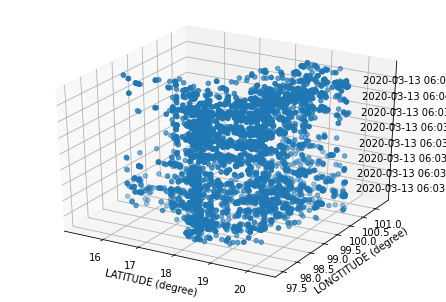

In [ ]:
df['Datetimefloat64'] = df['Datetime'].values.astype(float)

fig = plt.figure()
ax = Axes3D(fig,rect=[0,0.1,1,1])
ax.scatter(df['LATITUDE'], df['LONGITUDE'], df['Datetimefloat64'])
plt.xlabel('LATITUDE (degree)')
plt.ylabel('LONGTITUDE (degree)')
ax.zaxis.set_ticklabels(df['Datetime'])

plt.show()